<a href="https://colab.research.google.com/github/hanseul1215/ESAA_study/blob/master/0513_text2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import glob ,os
path = '/content/drive/MyDrive/Colab Notebooks/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []

for file_ in all_files:

    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]  #/로!!
    filename = filename_.split('.')[0]

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,battery-life_ipod_nano_8gb,...
2,features_windows7,...
3,display_garmin_nuvi_255W_gps,...
4,free_bestwestern_hotel_sfo,...


In [5]:
# TF-IDF 형태로 피처 벡터화
from nltk.stem import WordNetLemmatizer
import nltk
import string

def LemTokens(tokens):
    lemmer = nltk.stem.WordNetLemmatizer()
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [6]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words = 'english',
                             ngram_range=(1, 2), min_df = 0.05, max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [8]:
# 5개 군집화 - K평균
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [9]:
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
1,battery-life_ipod_nano_8gb,...,0
2,features_windows7,...,2
3,display_garmin_nuvi_255W_gps,...,2
4,free_bestwestern_hotel_sfo,...,3


In [10]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,battery-life_amazon_kindle,...,0
1,battery-life_ipod_nano_8gb,...,0
12,battery-life_netbook_1005ha,...,0
26,keyboard_netbook_1005ha,...,0
24,performance_netbook_1005ha,...,0
45,screen_garmin_nuvi_255W_gps,...,0
37,screen_ipod_nano_8gb,...,0
43,screen_netbook_1005ha,...,0
38,size_asus_netbook_1005ha,...,0
41,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,0


In [11]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
15,comfort_honda_accord_2008,...,1
17,comfort_toyota_camry_2007,...,1
14,gas_mileage_toyota_camry_2007,...,1
5,interior_honda_accord_2008,...,1
21,interior_toyota_camry_2007,...,1
30,mileage_honda_accord_2008,...,1
29,performance_honda_accord_2008,...,1
33,quality_toyota_camry_2007,...,1
40,seats_honda_accord_2008,...,1
35,transmission_toyota_camry_2007,...,1


In [12]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,2
9,buttons_amazon_kindle,...,2
13,directions_garmin_nuvi_255W_gps,...,2
3,display_garmin_nuvi_255W_gps,...,2
16,eyesight-issues_amazon_kindle,...,2
2,features_windows7,...,2
11,fonts_amazon_kindle,...,2
31,navigation_amazon_kindle,...,2
18,price_amazon_kindle,...,2
19,satellite_garmin_nuvi_255W_gps,...,2


In [13]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
10,bathroom_bestwestern_hotel_sfo,...,3
4,free_bestwestern_hotel_sfo,...,3
22,location_bestwestern_hotel_sfo,...,3
28,location_holiday_inn_london,...,3
25,parking_bestwestern_hotel_sfo,...,3
27,price_holiday_inn_london,...,3
20,room_holiday_inn_london,...,3
23,rooms_bestwestern_hotel_sfo,...,3
32,rooms_swissotel_chicago,...,3
42,staff_bestwestern_hotel_sfo,...,3


In [14]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
8,food_holiday_inn_london,...,4
7,food_swissotel_chicago,...,4
50,service_bestwestern_hotel_sfo,...,4
46,service_holiday_inn_london,...,4
49,service_swissotel_hotel_chicago,...,4


In [15]:
# 3개로 군집화
km_cluster = KMeans(n_clusters=3, max_iter = 10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [16]:
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
26,keyboard_netbook_1005ha,...,0
34,video_ipod_nano_8gb,...,0
24,performance_netbook_1005ha,...,0
36,voice_garmin_nuvi_255W_gps,...,0
37,screen_ipod_nano_8gb,...,0
38,size_asus_netbook_1005ha,...,0
39,speed_garmin_nuvi_255W_gps,...,0
19,satellite_garmin_nuvi_255W_gps,...,0
18,price_amazon_kindle,...,0


In [17]:
print(document_df[document_df['cluster_label']==0].sort_values(by='cluster_label'))
print(document_df[document_df['cluster_label']==1].sort_values(by='cluster_label'))
print(document_df[document_df['cluster_label']==2].sort_values(by='cluster_label'))

                           filename  \
0     accuracy_garmin_nuvi_255W_gps   
44                   speed_windows7   
43            screen_netbook_1005ha   
41              sound_ipod_nano_8gb   
39       speed_garmin_nuvi_255W_gps   
38         size_asus_netbook_1005ha   
37             screen_ipod_nano_8gb   
36       voice_garmin_nuvi_255W_gps   
34              video_ipod_nano_8gb   
31         navigation_amazon_kindle   
26          keyboard_netbook_1005ha   
45      screen_garmin_nuvi_255W_gps   
24       performance_netbook_1005ha   
18              price_amazon_kindle   
16    eyesight-issues_amazon_kindle   
13  directions_garmin_nuvi_255W_gps   
12      battery-life_netbook_1005ha   
11              fonts_amazon_kindle   
9             buttons_amazon_kindle   
6        battery-life_amazon_kindle   
3      display_garmin_nuvi_255W_gps   
2                 features_windows7   
1        battery-life_ipod_nano_8gb   
19   satellite_garmin_nuvi_255W_gps   
48     updates_garmin_nuv

In [18]:
# 군집별 핵심 단어 추출하기
cluster_centers = km_cluster.cluster_centers_ # 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해 있는지
print('cluster_centers shape:', cluster_centers.shape)
print(cluster_centers)
#1에 가까울 수록 중심과 가까운 값

cluster_centers shape: (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]]


In [19]:
# argsort로 큰 값을 가진 위치 인덱스 추출 -> 핵심 단어 피처 이름 출력
#군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값 대상 파일명을 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}

    #cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    #개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num):

        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        #cluster_centers_.argsort()[:, ::-1]로 구한 인덱스를 이용해 top n 피처 단어 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
        
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] ==cluster_num]['filename']
        filenames = filenames.values.tolist()

        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [20]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('##### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명:', cluster_detail['filenames'][:7])
        print('================================================')

In [21]:
feature_names = tfidf_vect.get_feature_names()

cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                      feature_names = feature_names, clusters_num = 3, top_n_features = 10)
print_cluster_details(cluster_details)

##### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명: ['accuracy_garmin_nuvi_255W_gps', 'battery-life_ipod_nano_8gb', 'features_windows7', 'display_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'buttons_amazon_kindle', 'fonts_amazon_kindle']
##### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명: ['free_bestwestern_hotel_sfo', 'food_swissotel_chicago', 'food_holiday_inn_london', 'bathroom_bestwestern_hotel_sfo', 'room_holiday_inn_london', 'location_bestwestern_hotel_sfo', 'rooms_bestwestern_hotel_sfo']
##### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명: ['interior_honda_accord_2008', 'gas_mileage_toyota_camry_2007', 'comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'interior_toyota_cam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 캐글 Mercari Price Suggestion Challenge

In [26]:
# 데이터 전처리
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head()

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [27]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


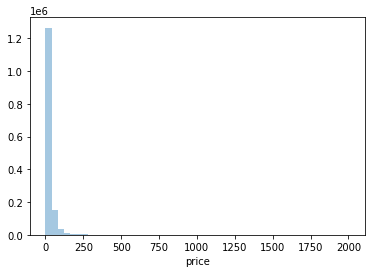

In [28]:
# target(price) 분포
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, kde=False)

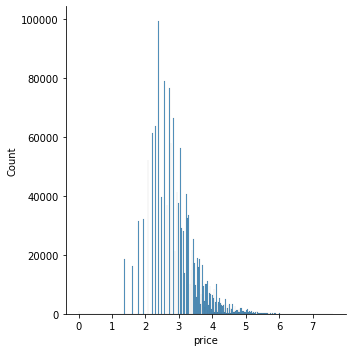

In [29]:
# 로그 변환
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.displot(y_train_df, kde=False)

In [30]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head()

0    2.397895
1    3.970292
2    2.397895
3    3.583519
4    3.806662
Name: price, dtype: float64

In [31]:
# shipping, item_condition_id
print('Shipping 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [32]:
boolean_cond = mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [33]:
# category_name

#apply lambda에서 호출되는 대, 중, 소 분할 함수 생성, 대, 중 소 값을 리스트로 반환
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']

mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so'] = zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

print('대분류 유형: \n', mercari_df['cat_dae'].value_counts())
print('중분류 개수:', mercari_df['cat_jung'].nunique())
print('소분류 개수:', mercari_df['cat_so'].nunique())

대분류 유형: 
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수: 114
소분류 개수: 871


In [34]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value = 'Other_Null')
mercari_df['category_name'] = mercari_df['category_name'].fillna(value = 'Other_Null')
mercari_df['item_description'] = mercari_df['item_description'].fillna(value = 'Other_Null')

mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [35]:
# 피처 인코딩과 피처 벡터화
print('brand name의 유형 건수:', mercari_df['brand_name'].nunique())
print('brand name sample 5건:\n', mercari_df['brand_name'].value_counts()[:5])

brand name의 유형 건수: 4810
brand name sample 5건:
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [36]:
print('name의 유형 건수:', mercari_df['name'].nunique())
print('name sample 10건:\n', mercari_df['name'].value_counts()[:10])

name의 유형 건수: 1225273
name sample 10건:
 Bundle                 2232
Reserved                453
Converse                445
BUNDLE                  418
Dress                   410
Coach purse             404
Lularoe TC leggings     396
Romper                  353
Nike                    340
Vans                    334
Name: name, dtype: int64


In [37]:
pd.set_option('max_colwidth', 200)

print('item_description의 평균 문자열 크기:', mercari_df['item_description'].str.len().mean())
mercari_df['item_description'][:2]

item_description의 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

In [38]:
# TF-IDF 변환
#name 속성에 대한 피처 벡터화 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mercari_df.name)

#item_description에 대한 피처 벡터화 변환
tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range=(1, 3), stop_words = 'english')
X_descp = tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:', X_name.shape)
print('item_description vectorization shape:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shape: (1482535, 50000)


In [39]:
from sklearn.preprocessing import LabelBinarizer

#brand_name, item_condition_id, shipping 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping = LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mercari_df['shipping'])

#cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 웟-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output = True)
X_cat_dae = lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung = LabelBinarizer(sparse_output = True)
X_cat_jung = lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so = LabelBinarizer(sparse_output = True)
X_cat_so = lb_cat_so.fit_transform(mercari_df['cat_so'])

In [40]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [42]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

#hstack 함수를 이용해 인코딩과 벡터화를 수행한 데이터 세트를 모두 결합
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

#데이터 세트가 메모리를 많이 차지하므로 바로 메모리에서 삭제
del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


288

In [2]:
# 릿지 회귀 모델 구출 및 평가

def rmsle(y, y_pred):
    #underflow, overflow를 막기 위해 log가 아닌 log1p로 rmsle 계산
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
    #원본 데이터는 log1p로 변환되었으므로 exmpm1로 복원 필요
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)

    #rmsle로 RMSLE 값 추출
    rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
    return rmsle_result

In [3]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    #scipy.sparse 모듈이 hstack을 이용해 희소 행렬 결합
    X = hstack(matrix_list).tocsr()

    X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size = 0.2, random_state = 156)

    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    del X, X_train, X_test, y_train
    gc.collect()

    return preds, y_test

In [ ]:
# LightGBM
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators = 200, learning_rate = 0.5, num_leaves = 125, random_state = 156)
lgbm_preds, y_test = model_train_predict(model = lgbm_model, matrix_list = sparse_matrix_list)
print('LightGBM rmsle 값:', evaluate_org_price(y_test, lgbm_preds))

In [ ]:
preds = lgbm_preds *0.45 + linear_preds *0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:', evaluate_org_price(y_test, preds))